In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import datetime
from sklearn.preprocessing import LabelEncoder
#한글깨짐방지
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
path = './data/'
train = pd.read_csv(path +'201901-202003.csv')
submission = pd.read_csv(path + 'submission.csv')

### 2020-07-27 15:15:39 idea
* 업종의 특성   
 이용건수는 낮으나 매출이 높은경우, 혹은 그 반대  
 계절적요인을 타지 않는다면 변수로 사용  
 지역적요인을 타는지 확인  
* 업종의 특성(외부인)  
 외부인의 이용건수는 낮으나 매출이 높은경우(호텔업?) 혹은 그 반대  
 계절적요인을 타지 않는다면 변수로 사용  
 지역적요인을 타는지 확인  
* 환불
 이용건수가 이용고객보다 많은 경우  
 계절적요인을 타지 않는다면 변수로 사용  
 지역적요인을 타는지 확인  

## 업종의특성

In [7]:
train.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [8]:
def draw_eda_graph(col,head_num=20):
    '''간단한 eda용 그래프
    전체row수, 거래건수
    금액, 거래건수당 금액
    이용고객수, 거래건수당 이용고객에 대한 그래프 생성
    
    parameters
    ---------
    col(string) : eda확인할 컬럼명
    head_num(int) : 전체중 확인할 상위 item의 수
    '''
#     col = 'CARD_SIDO_NM'
    num_row = 3
    num_col = 2

    #단순 일자별 row개수 비교
    plt.figure(figsize=(15,12))
    plt.subplot(num_row,num_col,1)
    per_row = train[col].value_counts().head(head_num).sort_index()
    sns.barplot(x = per_row.index, y = per_row)
    plt.title('단순row수')
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation = 45)

    #이용건수
    per_count = train.groupby(col)['CNT'].sum()
    per_count1 = per_count.sort_values(ascending = False).head(head_num).sort_index()
    plt.subplot(num_row,num_col,2)
    sns.barplot(x = per_count1.index, y = per_count1)
    plt.title('이용건수')
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation = 45)

    #이용금액
    per_cost = train.groupby(col)['AMT'].sum()
    per_cost1 = per_cost.sort_values(ascending = False).head(head_num).sort_index()
    plt.subplot(num_row,num_col,3)
    sns.barplot(x = per_cost1.index, y = per_cost1)
    plt.title('이용금액')
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation = 45)

    #이용건수당 이용금액
    per_count_cost = per_cost/per_count
    per_count_cost = per_count_cost.sort_values(ascending = False).head(head_num).sort_index()
    plt.subplot(num_row,num_col,4)
    sns.barplot(x = per_count_cost.index, y = per_count_cost)
    plt.title('이용건수당 이용금액')
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation = 45)

    #이용고객수 
    per_custom = train.groupby(col)['CSTMR_CNT'].sum()
    per_custom1 = per_custom.sort_values(ascending = False).head(head_num).sort_index()
    plt.subplot(num_row,num_col,5)
    sns.barplot(x = per_custom1.index, y = per_custom1)
    plt.title('이용고객수')
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation = 45)

    #이용건수당 이용고객수
    per_count_cost = per_custom/per_count
    per_count_cost = per_count_cost.sort_values(ascending = False).head(head_num).sort_index()
    plt.subplot(num_row,num_col,6)
    sns.barplot(x = per_count_cost.index, y = per_count_cost)
    plt.title('이용건수당 이용고객수')
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation = 45)


    plt.suptitle(col)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #left,bottom,right,top
    plt.show()

In [13]:
def encoding(df,col):
    ''' col이 object type일때 encoding 진행
    '''
    encoders = {}
    encoder = LabelEncoder()
    if df[col].dtype == 'object':
        encoder.fit(df[col])
        encoders[col] = encoder
        df[col] = encoder.transform(df[col])
    return df, encoders 

### 이전거 확인
* 분명차이나는 업종이 있다

In [14]:
#인코딩 
train, encoders = encoding(train,"STD_CLSS_NM")
job_name = encoders['STD_CLSS_NM'].inverse_transform(train.STD_CLSS_NM.unique())

job_dict = {}
for i in range(len(job_name)):
    job_dict[i]= job_name[i]

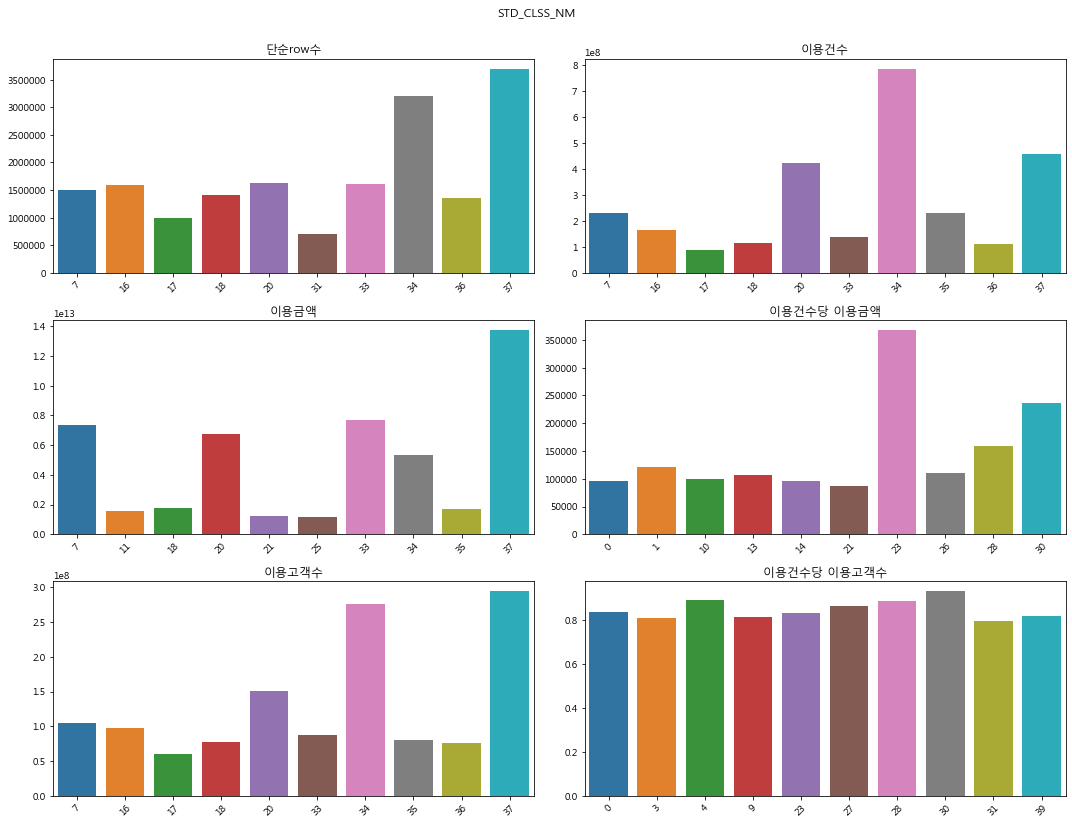

In [15]:
# 34 :면세점, 37, 기타수상오락서비스업의 건수가 높은편, 20 - 일반 유흥 주점업 또 높음 
# 건당 비용은 23 : 중식 음식점이 높고 30- 화장품 및 방향제 소매업이 높음
#
draw_eda_graph("STD_CLSS_NM",10)

### 계절적 변동이 있는지 확인

In [18]:
train['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(train.STD_CLSS_NM)

In [226]:
class_amt = train.pivot_table(index='STD_CLSS_NM',columns = 'REG_YYMM',values='AMT',aggfunc='sum')
class_cnt = train.pivot_table(index='STD_CLSS_NM',columns = 'REG_YYMM',values='CNT',aggfunc='sum')

##### 상관계수로 두변수 연관성 측정

In [270]:
import scipy.stats as stats

# 피어슨 상관계수 검정
i = 6
corr = stats.pearsonr(class_amt.iloc[i], class_cnt.iloc[i])
corr

(0.11673516595320818, 0.6786455289474448)

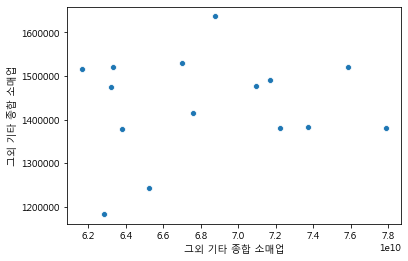

In [271]:
sns.scatterplot(x = class_amt.iloc[i], y = class_cnt.iloc[i])

In [240]:
class_per = class_amt/class_cnt

### 정규분포를 따르는지 확인
* 20년 포함
* 활용??? 100이라도 곱해서 사용하나? 이걸 어떻게 쓰지?

In [242]:
from scipy.stats import shapiro
p_values =[]
corrs = []
for i in range(len(class_per)): 
    corrs.append(shapiro(class_per.iloc[i])[0])
    p_values.append(shapiro(class_per.iloc[i])[1])

In [230]:
p_values = pd.Series(p_values)

out_index= p_values[p_values<0.05].index.values

#정규분포를 따르지않는 업종들
class_per.index[out_index]

Index(['그외 기타 스포츠시설 운영업', '마사지업', '면세점', '서양식 음식점업', '슈퍼마켓', '육류 소매업',
       '일식 음식점업', '자동차 임대업', '정기 항공 운송업', '택시 운송업', '피자 햄버거 샌드위치 및 유사 음식점업',
       '한식 음식점업'],
      dtype='object', name='STD_CLSS_NM')

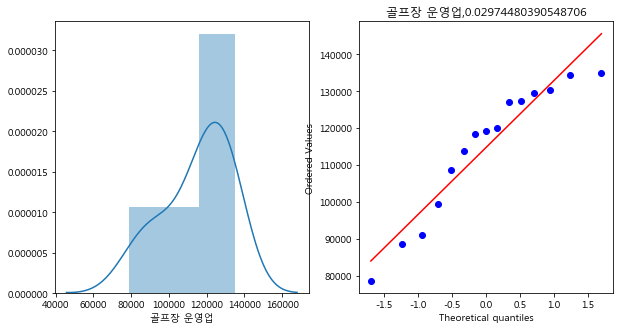

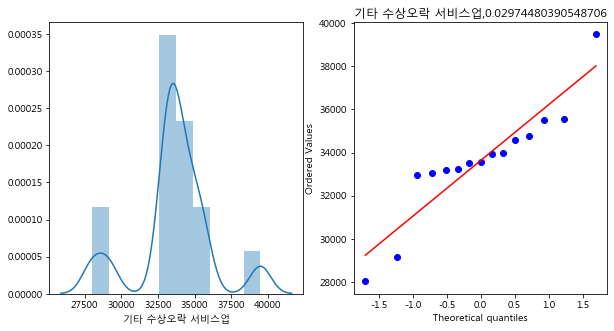

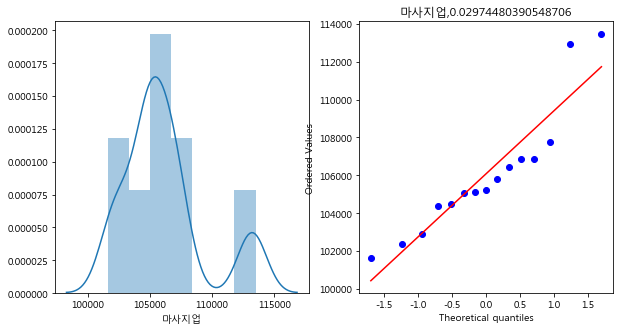

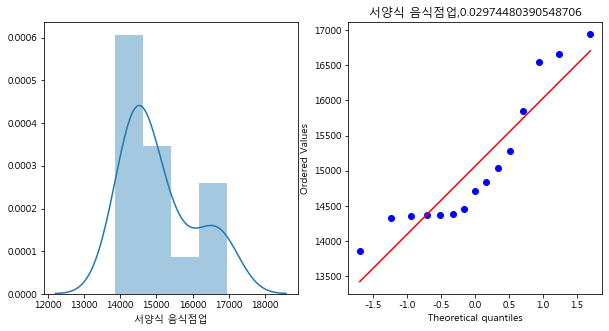

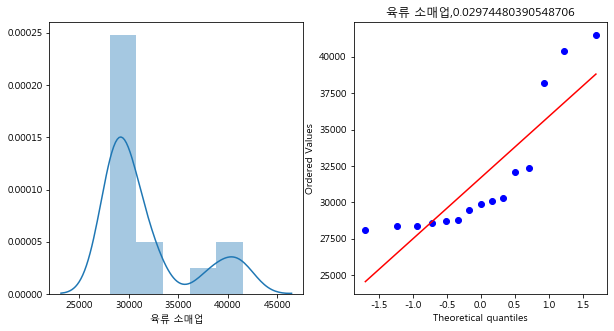

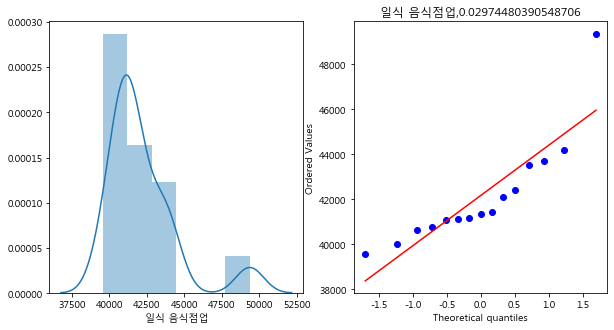

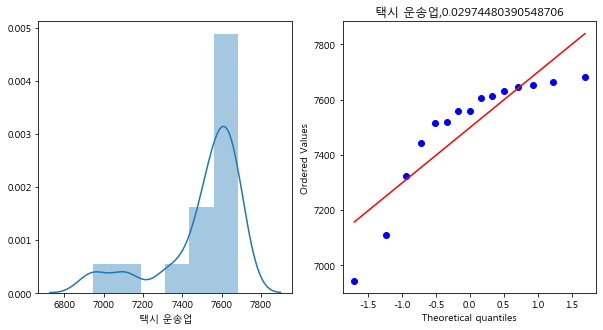

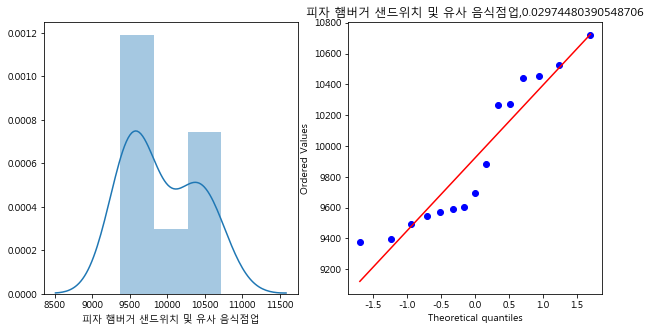

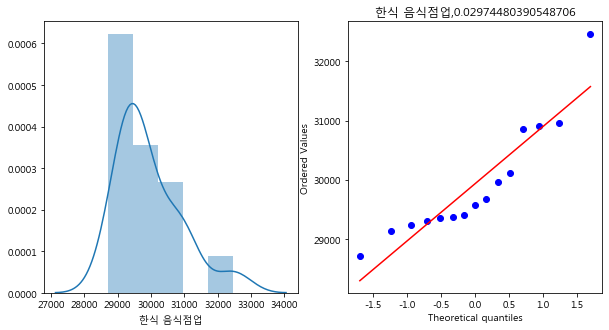

In [150]:
for i in out_index:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(class_per.iloc[i])
    plt.subplot(1,2,2)
    sp.stats.probplot(class_per.iloc[i], plot=plt)
    p_value = shapiro(class_per.iloc[i])[1]
    plt.title(f"{class_per_19.index[i]},{p_value}")
    plt.show()

### 20년 제외
* 20년을 제외해도 해당업종들은 정규분포를 따르지 않음

In [223]:
class_per_19 = class_per.iloc[:,:-3]

In [224]:
from scipy.stats import shapiro
p_values =[]
for i in range(len(class_per_19)): 
    p_values.append(shapiro(class_per_19.iloc[i])[1])

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [222]:
p_values = pd.Series(p_values)

out_index= p_values[p_values<0.05].index.values

#정규분포를 따르지않는 업종들
class_per.index[out_index]

Int64Index([   4,    5,   12,   19,   22,   31,   40,   43,   44,   48,
            ...
            7719, 7723, 7724, 7727, 7728, 7729, 7730, 7731, 7737, 7740],
           dtype='int64', length=1818)

In [147]:
shapiro(class_per.iloc[i])[1]

0.10382425785064697

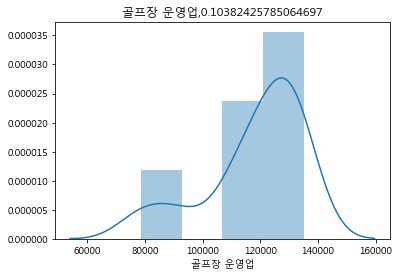

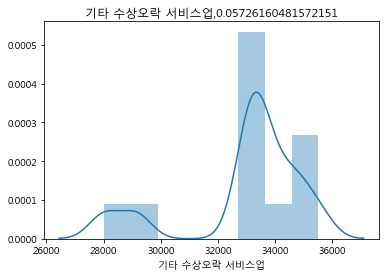

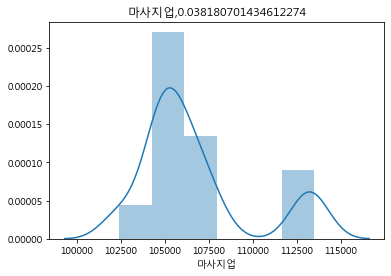

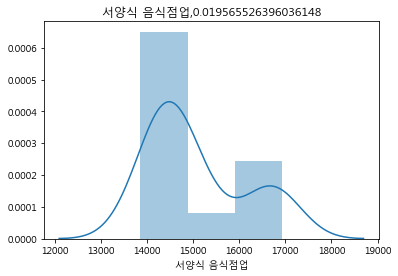

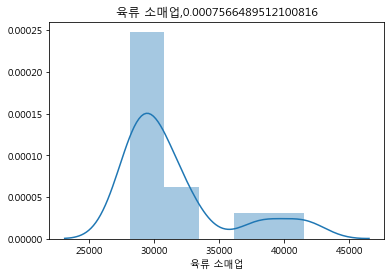

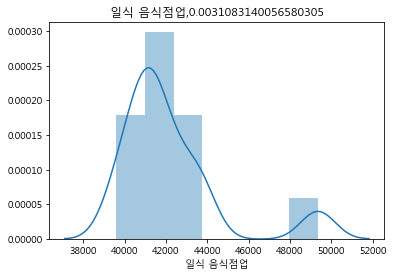

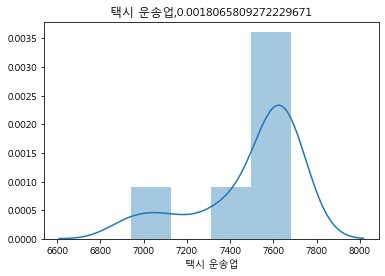

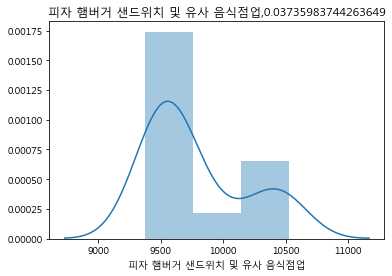

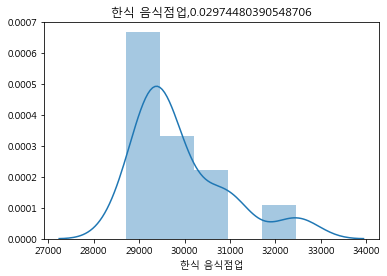

In [149]:
for i in out_index:
    sns.distplot(class_per_19.iloc[i])
    p_value = shapiro(class_per.iloc[i])[1]
    plt.title(f"{class_per_19.index[i]},{p_value}")
    plt.show()

(array([4., 0., 3., 1., 3., 0., 2., 0., 0., 2.]),
 array([ 539.36597378, 1004.01655249, 1468.6671312 , 1933.31770991,
        2397.96828863, 2862.61886734, 3327.26944605, 3791.92002476,
        4256.57060347, 4721.22118219, 5185.8717609 ]),
 <a list of 10 Patch objects>)

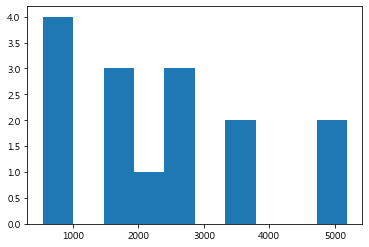

In [55]:
i = 2
plt.hist(abs(class_per.iloc[i] -class_per.iloc[i].mean()))

### 지역적변동이 있는지 확인(시군구)
* 20년 포함
* 지역별로 관계가 있는것으로 추정

In [153]:
class_amt = train.pivot_table(index=['CARD_SIDO_NM','CARD_CCG_NM','STD_CLSS_NM'],columns = 'REG_YYMM',values='AMT',aggfunc='sum').reset_index()
class_cnt = train.pivot_table(index=['CARD_SIDO_NM','CARD_CCG_NM','STD_CLSS_NM'],columns = 'REG_YYMM',values='CNT',aggfunc='sum').reset_index()

class_per = class_amt.iloc[:,3:]/class_cnt.iloc[:,3:]
class_per = pd.concat([class_amt.iloc[:,:3],class_per],axis = 1)

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [216]:
p_values =[]
for i in range(len(class_per)): 
    sample = class_per.iloc[i,3:].dropna()
    try :
        p_values.append(shapiro(sample)[1])
    except : 
        p_values.append(np.nan)

In [217]:
p_values = pd.Series(p_values)
index_nan = p_values[p_values.isna()].index
index_out = p_values[p_values<0.05].index

In [210]:
#특정지역의 특정업종(184건)은 데이터가 없음 
#시군구단위의 위험성 
class_per.loc[index_nan]

REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
28,강원,강릉시,택시 운송업,NaN,NaN,4692.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,강원,고성군,마사지업,86666.666667,NaN,NaN,NaN,NaN,NaN,140000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,강원,동해시,내항 여객 운송업,NaN,NaN,NaN,NaN,NaN,156393.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,강원,동해시,자동차 임대업,176666.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,강원,삼척시,그외 기타 스포츠시설 운영업,25000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7527,충북,증평군,마사지업,NaN,NaN,NaN,NaN,88000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7624,충북,청주시 서원구,여행사업,NaN,NaN,NaN,NaN,NaN,80000.0,66000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7635,충북,청주시 서원구,택시 운송업,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7505.000000,NaN,NaN,5625.0
7697,충북,청주시 흥덕구,자동차 임대업,NaN,NaN,NaN,128333.333333,NaN,NaN,NaN,143000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
#전체업종과 달리 육류소매업은 정규성을 안따름
class_per.loc[index_out].STD_CLSS_NM.value_counts()

육류 소매업                   187
기타음식료품위주종합소매업            109
전시 및 행사 대행업              100
그외 기타 종합 소매업              97
일식 음식점업                   87
관광 민예품 및 선물용품 소매업         82
과실 및 채소 소매업               79
여관업                       71
슈퍼마켓                      70
서양식 음식점업                  65
피자 햄버거 샌드위치 및 유사 음식점업     63
욕탕업                       56
수산물 소매업                   53
마사지업                      44
건강보조식품 소매업                43
차량용 가스 충전업                42
차량용 주유소 운영업               39
체인화 편의점                   39
한식 음식점업                   38
그외 기타 스포츠시설 운영업           38
호텔업                       34
중식 음식점업                   34
화장품 및 방향제 소매업             32
자동차 임대업                   30
기타 주점업                    28
기타 대형 종합 소매업              27
스포츠 및 레크레이션 용품 임대업        26
일반유흥 주점업                  26
택시 운송업                    26
골프장 운영업                   25
여행사업                      21
기타 외국식 음식점업               21
휴양콘도 운영업                  20
빵 및 과자류 소매업               19
기타 수상오락 서비스업  

In [198]:
class_per[class_per.STD_CLSS_NM == '육류 소매업']

REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
19,강원,강릉시,육류 소매업,61352.243208,70035.285515,55039.286218,47258.769419,47808.636076,49705.670868,49388.165065,49262.937296,67659.347097,49694.352686,52629.714380,56452.279892,67599.216014,49944.438272,46573.364496
51,강원,고성군,육류 소매업,22754.219723,27023.535117,18080.461285,16133.581105,17764.029207,15579.934993,17473.572519,17235.385876,27009.581152,17233.260553,17090.862866,23085.919003,25768.429630,17450.547337,21773.349206
83,강원,동해시,육류 소매업,40472.212885,50264.675623,33467.394534,36090.612202,36639.264118,36691.538793,41661.181339,40707.695044,65651.372400,42044.612617,42092.858431,47896.911092,63799.371204,40279.082199,41269.592924
116,강원,삼척시,육류 소매업,47490.103717,61634.642526,43563.936862,44599.712230,47673.965487,43285.446182,41416.159861,49000.762646,69977.147743,45888.861859,49985.589958,52737.491935,63548.674451,42680.592885,43292.811854
150,강원,속초시,육류 소매업,48835.745213,61674.010417,39971.872779,43236.787843,41700.635492,39978.878676,39841.377508,45391.388688,59320.644481,46754.601871,45051.294372,54021.627069,65984.326456,41945.156268,47471.681377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7594,충북,청주시 상당구,육류 소매업,31506.973269,37334.002836,27489.566289,27880.476881,30675.367282,28591.757890,29015.094755,29446.477145,39686.310884,27995.991928,29264.808502,31207.852780,39637.858802,27882.411547,28231.189222
7626,충북,청주시 서원구,육류 소매업,34252.543652,40627.765328,29957.737559,30010.275970,31908.400333,30232.034672,31250.068859,32769.472688,43106.600000,31760.297163,32222.169255,36492.061880,41478.286935,31085.764157,30386.962263
7660,충북,청주시 청원구,육류 소매업,39077.638864,47029.053611,33440.006309,32574.121905,33330.612899,32743.236839,32700.092893,33641.314183,48935.841775,35792.119801,35344.332132,37312.164726,46751.002069,33447.014418,32920.514729
7694,충북,청주시 흥덕구,육류 소매업,32785.649831,41874.429659,28800.604954,29372.447585,30933.652464,30358.456700,28487.852834,31122.586923,43423.233229,30801.003543,31373.107517,33438.768782,41069.120123,28615.056554,29195.337999


### 20년제외

In [202]:
class_per_19 = class_per.iloc[:,:-3]

In [214]:
p_values =[]
for i in range(len(class_per_19)): 
    sample = class_per_19.iloc[i,3:].dropna()
    try :
        p_values.append(shapiro(sample)[1])
    except : 
        p_values.append(np.nan)

p_values = pd.Series(p_values)
# index_nan = p_values[p_values.isna()].index
index_out_19 = p_values[p_values<0.05].index

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [218]:
class_per.loc[index_out].STD_CLSS_NM.value_counts().head(15)

육류 소매업                   187
기타음식료품위주종합소매업            109
전시 및 행사 대행업              100
그외 기타 종합 소매업              97
일식 음식점업                   87
관광 민예품 및 선물용품 소매업         82
과실 및 채소 소매업               79
여관업                       71
슈퍼마켓                      70
서양식 음식점업                  65
피자 햄버거 샌드위치 및 유사 음식점업     63
욕탕업                       56
수산물 소매업                   53
마사지업                      44
건강보조식품 소매업                43
Name: STD_CLSS_NM, dtype: int64

In [215]:
class_per_19.loc[index_out_19].STD_CLSS_NM.value_counts().head(15)

육류 소매업                   179
기타음식료품위주종합소매업            101
일식 음식점업                   92
피자 햄버거 샌드위치 및 유사 음식점업     82
그외 기타 종합 소매업              82
서양식 음식점업                  77
과실 및 채소 소매업               76
전시 및 행사 대행업               68
관광 민예품 및 선물용품 소매업         64
슈퍼마켓                      55
여관업                       55
한식 음식점업                   54
체인화 편의점                   49
욕탕업                       48
수산물 소매업                   47
Name: STD_CLSS_NM, dtype: int64

In [219]:
class_per.STD_CLSS_NM.unique()

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타 외국식 음식점업',
       '기타 주점업', '기타음식료품위주종합소매업', '마사지업', '비알콜 음료점업', '빵 및 과자류 소매업',
       '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '여관업', '욕탕업',
       '육류 소매업', '일반유흥 주점업', '일식 음식점업', '자동차 임대업', '전시 및 행사 대행업',
       '중식 음식점업', '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점', '택시 운송업',
       '피자 햄버거 샌드위치 및 유사 음식점업', '한식 음식점업', '호텔업', '화장품 및 방향제 소매업',
       '휴양콘도 운영업', '여행사업', '내항 여객 운송업', '면세점', '기타 수상오락 서비스업', '버스 운송업',
       '그외 기타 분류안된 오락관련 서비스업', '정기 항공 운송업'], dtype=object)

### 지역변동있는지 확인(시도)

In [273]:
class_amt = train.pivot_table(index=['CARD_SIDO_NM','STD_CLSS_NM'],columns = 'REG_YYMM',values='AMT',aggfunc='sum').reset_index()
class_cnt = train.pivot_table(index=['CARD_SIDO_NM','STD_CLSS_NM'],columns = 'REG_YYMM',values='CNT',aggfunc='sum').reset_index()

class_per = class_amt.iloc[:,2:]/class_cnt.iloc[:,2:]
class_per = pd.concat([class_amt.iloc[:,:2],class_per],axis = 1)

In [274]:
class_per

REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
0,강원,건강보조식품 소매업,131520.164894,126807.148660,107293.161765,102253.812860,119931.771660,100368.943648,93251.744960,100225.835020,136629.147039,104524.509468,90068.540863,96879.260427,133195.657307,105379.560606,115316.941176
1,강원,골프장 운영업,36825.558345,43010.114670,116511.085088,137712.940850,130373.323991,131528.989596,120154.329577,109843.817359,133919.154193,143526.999314,143727.460611,71563.975356,52873.599923,77781.419565,138274.671362
2,강원,과실 및 채소 소매업,41448.602448,43229.257339,37147.126641,35821.144292,36823.092466,34868.274699,35107.601363,37806.956131,44095.525415,40242.983113,39254.237097,39444.177872,46026.816658,36721.475271,33385.359521
3,강원,관광 민예품 및 선물용품 소매업,24447.185008,23270.202030,22342.133929,23133.863049,23984.834515,20767.120701,19665.858586,18381.271640,18840.116216,18482.859826,19004.957002,22494.135338,22285.694752,21980.536913,21105.071315
4,강원,그외 기타 분류안된 오락관련 서비스업,NaN,NaN,NaN,NaN,17700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,충북,피자 햄버거 샌드위치 및 유사 음식점업,11453.615727,11493.502311,10677.897891,10328.817689,10112.045842,10007.509903,10324.538412,10304.862409,10275.129985,9936.707710,10288.109210,11031.010760,11119.261731,11312.088390,11506.152666
646,충북,한식 음식점업,30136.854823,28399.934163,28958.323135,28214.198702,28174.064014,28051.937968,28342.124276,27093.723662,26383.958730,27284.180903,27584.474929,30959.415401,28520.866135,29839.628585,29148.003450
647,충북,호텔업,38386.177187,38944.207569,38248.418259,43234.717182,56498.842239,71300.969072,35828.947368,44947.477204,56133.078176,40769.123021,56260.688935,52693.665236,38589.962652,25707.433036,58874.710425
648,충북,화장품 및 방향제 소매업,41989.169749,40570.122957,42516.522211,41533.471143,38582.026064,40108.936947,37249.626693,37075.605957,39264.090037,41524.682271,41867.701018,42231.402424,42783.226068,45949.403602,42832.461200


In [280]:
p_values =[]
for i in range(len(class_per)): 
    sample = class_per.iloc[i,3:].dropna()
    try :
        p_values.append(shapiro(sample)[1])
    except : 
        p_values.append(np.nan)

p_values = pd.Series(p_values)
index_nan = p_values[p_values.isna()].index
index_out = p_values[p_values<0.05].index

In [283]:
#8건 nan가 많음
class_per.loc[index_nan]

REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
4,강원,그외 기타 분류안된 오락관련 서비스업,NaN,NaN,NaN,NaN,17700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,대전,여행사업,NaN,1515000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,세종,그외 기타 분류안된 오락관련 서비스업,NaN,NaN,NaN,NaN,39333.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,세종,그외 기타 스포츠시설 운영업,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56000.0,NaN,NaN
352,세종,기타 수상오락 서비스업,22733.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380,울산,그외 기타 분류안된 오락관련 서비스업,NaN,NaN,NaN,NaN,NaN,NaN,36666.666667,49166.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,전남,기타 수상오락 서비스업,NaN,NaN,NaN,NaN,NaN,NaN,42000.000000,111678.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486,전남,택시 운송업,NaN,NaN,NaN,NaN,6070.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
#육류, 소매업, 일식 정규성을 따르지 않음
class_per.loc[index_out]['STD_CLSS_NM'].value_counts()

육류 소매업                   17
그외 기타 종합 소매업             13
일식 음식점업                  13
슈퍼마켓                     13
기타음식료품위주종합소매업            11
그외 기타 스포츠시설 운영업          11
택시 운송업                    8
피자 햄버거 샌드위치 및 유사 음식점업     7
한식 음식점업                   7
관광 민예품 및 선물용품 소매업         7
서양식 음식점업                  7
과실 및 채소 소매업               6
건강보조식품 소매업                6
전시 및 행사 대행업               6
욕탕업                       5
여행사업                      5
내항 여객 운송업                 5
자동차 임대업                   5
휴양콘도 운영업                  4
정기 항공 운송업                 4
마사지업                      3
화장품 및 방향제 소매업             3
호텔업                       3
버스 운송업                    3
골프장 운영업                   3
여관업                       3
차량용 주유소 운영업               2
수산물 소매업                   2
체인화 편의점                   2
기타 외국식 음식점업               1
기타 대형 종합 소매업              1
기타 수상오락 서비스업              1
기타 주점업                    1
차량용 가스 충전업                1
그외 기타 분류안된 오락관련 서비스업      1
일반유흥 주점업            